In [1]:
%matplotlib widget

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from matplotlib.colors import LightSource

from PIL import Image

import math

In [2]:
mult = 30 # Во сколько раз увеличивать размеры орбит

In [3]:
rad_sun = 6
rad_mer = 3/2
rad_ven = 5/2
rad_ear = 6/2
rad_mar = 4/2

In [4]:
class planet():
    def __init__(self, exc, a, pereg, year):
        """exc - эксцентреситет орбиты, отвечает за сжатие эллипса
           a   - большая полуось, расстояние от центра эллипса до самой удаленной о него точки орбиты
           pereg - минимальное расстояние от солнца до земли
           year - количество дней на планете, или же на сколько точек делиться орбита
           b - малая полуось 
        """
        self.exc = exc
        self.a = a 
        self.b = ((exc*exc - 1)*(-a*a))**0.5
        self.pereg = pereg 
        self.year = year * 24
        self.orbit = []
        self.ocr = np.linspace(0,2*math.pi, year*24)
    def orbita(self, N = 200):
        """Возвращает массив координат точек орбиты
           N - количество точек траектории 
        """
        t = np.linspace(0, 2*np.pi, N)
        self.orbit = []
        for i in range(0,len(t)):
            self.orbit.append([self.a*math.cos(t[i]),self.b*math.sin(t[i]), 0])
        self.orbit  = mult*(np.array(self.orbit) - np.array([self.a - self.pereg, 0, 0]))
        return self.orbit
    def speed(self, i):    
        """На вход подается номер дня на планете, начиная с того момента, когда она была ближе всего к солнцу, результат в км/с"""
        ast_unit = 149597870700
        alpha = self.ocr[i%self.year]
        return ((6.6743015*1.98847*(10**19)/(self.b*self.b*ast_unit/self.a)*(1+2*self.exc*math.cos(alpha) + self.exc*self.exc))**0.5)/1000 
        

In [5]:
mer = planet(0.20563593, 0.38709927, 0.30749951, 88)
mar = planet(0.0933941,1.523662, 1.381, 687 )
ven = planet(0.0068, 0.723332, 0.71843270, 225 )
ear = planet(0.01671123, 1.00000261, 0.98329134, 365)

In [6]:
# Массив углов
t = np.linspace(0, 2*np.pi, 200)

In [7]:
# Уравнения орбит планет

or_mer = mer.orbita()
or_ven = ven.orbita()
or_ear = ear.orbita()
or_mar = mar.orbita()

In [8]:
def img(file:str):
    
    # Загрузка изображения и преобразование в формат RGBA
    image = Image.open(file)
    image_rgba = image.convert('RGBA')

    # Преобразование изображения в массив значений RGBA
    image_array = np.array(image_rgba) / 255.0  # Деление на 255 для нормализации
    
    return image_array


## Создание солнца

In [9]:
# Задаем углы-параметры 
t_1 = list(np.linspace(0, 2*np.pi, 20))
t_2 = list(np.linspace(0, np.pi, 20))

# Формируем сетку из параметров
u, v = np.meshgrid(t_1, t_2)

# Формируем массивы координат
x_sun = rad_sun*np.cos(u)*np.sin(v)
y_sun = rad_sun*np.sin(u)*np.sin(v)
z_sun = rad_sun*np.cos(v)

# Создание изображения
sun_img = img('Солнце2.png')

# Разворот оси Солнца
axle_tilt_sun = 180 * (np.pi/180)
rotate_axle_sun = np.array([[np.cos(axle_tilt_sun), -np.sin(axle_tilt_sun)], [np.sin(axle_tilt_sun), np.cos(axle_tilt_sun)]])

## Создание Меркурия

In [10]:
# Задаем углы-параметры 
t_1 = list(np.linspace(0, 2*np.pi, 20))
t_2 = list(np.linspace(0, np.pi, 20))

# Формируем сетку из параметров
u, v = np.meshgrid(t_1, t_2)

# Формируем массивы координат
x_mer = rad_mer*np.cos(u)*np.sin(v)
y_mer = rad_mer*np.sin(u)*np.sin(v)
z_mer = rad_mer*np.cos(v)

# Создание изображения
mer_img = img('Меркурий5.png')

## Создание Венеры

In [11]:
# Задаем углы-параметры 
t_1 = list(np.linspace(0, 2*np.pi, 20))
t_2 = list(np.linspace(0, np.pi, 20))

# Формируем сетку из параметров
u, v = np.meshgrid(t_1, t_2)

# Формируем массивы координат
x_ven = rad_ven*np.cos(u)*np.sin(v)
y_ven = rad_ven*np.sin(u)*np.sin(v)
z_ven = rad_ven*np.cos(v)

# Создание изображения
ven_img = img('Венера.png')

# Наклон оси планеты
axle_tilt_ven = 177 * (np.pi/180)
rotate_axle_ven = np.array([[np.cos(axle_tilt_ven), -np.sin(axle_tilt_ven)], [np.sin(axle_tilt_ven), np.cos(axle_tilt_ven)]])

## Создание Земли

In [12]:
# Формируем массивы координат
x_ear = rad_ear*np.cos(u)*np.sin(v)
y_ear = rad_ear*np.sin(u)*np.sin(v)
z_ear = rad_ear*np.cos(v)

# Создание изображения
ear_img = img('З.jpg')

# Наклон оси планеты
axle_tilt_ear = 23 * (np.pi/180)
rotate_axle_ear = np.array([[np.cos(axle_tilt_ear), -np.sin(axle_tilt_ear)], [np.sin(axle_tilt_ear), np.cos(axle_tilt_ear)]])

## Создание Марса

In [13]:
# Формируем массивы координат
x_mar = rad_mar*np.cos(u)*np.sin(v)
y_mar = rad_mar*np.sin(u)*np.sin(v)
z_mar = rad_mar*np.cos(v)

# Создание изображения
mar_img = img('Марс4.png')

# Наклон оси планеты
axle_tilt_mar = 3 * (np.pi/180)
rotate_axle_mar = np.array([[np.cos(axle_tilt_mar), -np.sin(axle_tilt_mar)], [np.sin(axle_tilt_mar), np.cos(axle_tilt_mar)]])

## Перемещение планет

In [14]:
# Массивы координат Меркурия
days_mer = 88 / 59
year_mer = 88 * 24
t_mer = np.linspace(0, 2*np.pi, year_mer)
anim_mer = mer.orbita(N = mer.year)

# Массивы координат Венеры
days_ven = 225 / 243
year_ven = 225 * 24
t_ven = np.linspace(0, 2*np.pi, year_ven)
anim_ven = ven.orbita(N = ven.year)

# Массивы координат Земли
days_ear = 365
year_ear = 365 * 24
t_ear = np.linspace(0, 2*np.pi, year_ear)
anim_ear = ear.orbita(N = ear.year)

# Массив координат Марса 
days_mar = 687
year_mar = 687 * 24
t_mar = np.linspace(0, 2*np.pi, year_mar)
anim_mar = mar.orbita(N = mar.year)

## Анимация

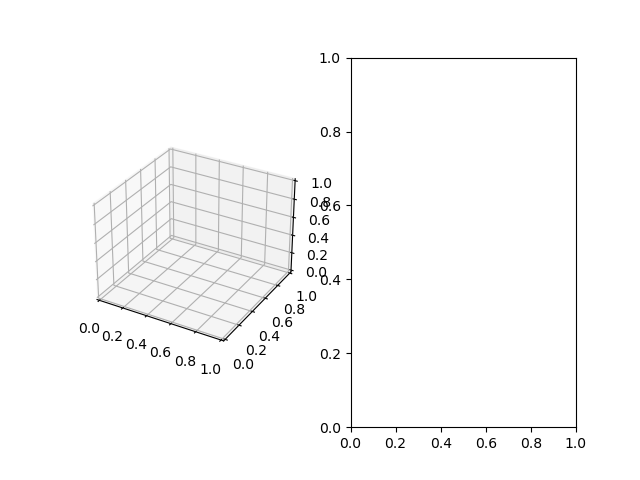

In [15]:
fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot(121, projection='3d')
ax_s = fig.add_subplot(122)

def at_frame(frame):
    
    # Очистка графической области на каждом кадре
    ax.clear()
    ax_s.clear()
    
    # Изображение орбит
    ax.plot(or_mer[:,0], or_mer[:,1], or_mer[:,2], color = 'grey', lw = 0.5)
    ax.plot(or_ven[:,0], or_ven[:,1], or_ven[:,2], color = 'grey', lw = 0.5)
    ax.plot(or_ear[:,0], or_ear[:,1], or_ear[:,2], color = 'grey', lw = 0.5)
    ax.plot(or_mar[:,0], or_mar[:,1], or_mar[:,2], color = 'grey', lw = 0.5)
    
    
    # Солнце
    # Заново высчитываем точки Солнца
    x_sun = rad_sun*np.cos(u)*np.sin(v)
    y_sun = rad_sun*np.sin(u)*np.sin(v)
    z_sun = rad_sun*np.cos(v)
    # Поворот Солнца вокруг своей оси
    theta_sun = (np.pi/180) * frame * (360 / (32 * 24))
    rot_sun = np.array([[np.cos(theta_sun), -np.sin(theta_sun)], [np.sin(theta_sun), np.cos(theta_sun)]])
    for i in range(len(x_sun)):
        m_sun = np.dot(rot_sun, np.array([x_sun[i], y_sun[i]]))
        x_sun[i], y_sun[i] = m_sun[0], m_sun[1]
    # Разворот оси Солнца
    rotated_sun = np.array([np.dot(rotate_axle_sun, np.array([x_sun[i], z_sun[i]])) for i in range(len(x_sun))])
    x_sun[:], z_sun[:] = rotated_sun[:, 0], rotated_sun[:, 1]
    
    
    # Изображение Солнца
    ax.plot_surface(x_sun, y_sun, z_sun, shade = False, facecolors = sun_img)
    ax.text(((x_sun.min() + x_sun.max()) * 0.5), ((y_sun.max() + y_sun.min()) * 0.5), (z_sun.max() * 2), 'Sun', fontsize = 'x-small', ha = 'center')
    
    
    # Меркурий
    frame_mer = frame % year_mer
    # Заново высчитываем точки Меркурия
    x_mer = rad_mer*np.cos(u)*np.sin(v)
    y_mer = rad_mer*np.sin(u)*np.sin(v)
    z_mer = rad_mer*np.cos(v)
    # Поворот Меркурия вокруг своей оси
    theta_mer = (np.pi/180) * frame * (days_mer * 360 / year_mer)
    rot_mer = np.array([[np.cos(theta_mer), -np.sin(theta_mer)], [np.sin(theta_mer), np.cos(theta_mer)]])
    for i in range(len(x_mer)):
        m_mer = np.dot(rot_mer, np.array([x_mer[i], y_mer[i]]))
        x_mer[i], y_mer[i] = m_mer[0], m_mer[1]
    # Расчитываем положения Меркурия на орбите
    x_mer_frame = x_mer + anim_mer[frame_mer, 0]
    y_mer_frame = y_mer + anim_mer[frame_mer, 1]
    z_mer_frame = z_mer + anim_mer[frame_mer, 2]
    # Расчет и установка освещения
    deg_mer = 90 - frame * (360 / year_mer)
    light_mer = LightSource(azdeg = deg_mer, altdeg = 0)
    
    
    # Изображение Меркурия
    ax.plot_surface(x_mer_frame, y_mer_frame, z_mer_frame, shade = True, facecolors = mer_img, lightsource = light_mer)
    ax.text(((x_mer_frame.min() + x_mer_frame.max()) * 0.5), ((y_mer_frame.max() + y_mer_frame.min()) * 0.5), (z_mer_frame.max() * 2), 'Mercury', fontsize = 'x-small', ha = 'center')
    
    mer_ocr = np.linspace(0,2*math.pi, year_mer)
    b = ((0.20563593*0.20563593 - 1)*(-0.38709927*0.38709927))**0.5
    mer_speed = ((6.6743015*1.98847*(10**19)/(b*b*149597870700/0.38709927)*(1+2*0.20563593*math.cos(mer_ocr[frame_mer]) + 0.20563593*0.20563593))**0.5)/1000 
    ax_s.text(0, 0.6, f"Mercury's data:\nSpeed: {round(mer_speed, 3)}km/s\nDay: {round(frame_mer/24)}   /{int(year_mer/24)}", bbox=dict(boxstyle="round", fc="gray", alpha=0.2))
    
    # Венера
    frame_ven = frame % year_ven
    # Заново высчитываем точки Венеры
    x_ven = rad_ven*np.cos(u)*np.sin(v)
    y_ven = rad_ven*np.sin(u)*np.sin(v)
    z_ven = rad_ven*np.cos(v)
    # Поворот Венеры вокруг своей оси
    theta_ven = (np.pi/180) * frame * (days_ven * 360 / year_ven)
    rot_ven = np.array([[np.cos(theta_ven), -np.sin(theta_ven)], [np.sin(theta_ven), np.cos(theta_ven)]])
    for i in range(len(x_ven)):
        m_ven = np.dot(rot_ven, np.array([x_ven[i], y_ven[i]]))
        x_ven[i], y_ven[i] = m_ven[0], m_ven[1]
    # Наклон оси Венеры
    rotated_ven = np.array([np.dot(rotate_axle_ven, np.array([x_ven[i], z_ven[i]])) for i in range(len(x_ven))])
    x_ven[:], z_ven[:] = rotated_ven[:, 0], rotated_ven[:, 1]
    # Расчитываем положения Венеры на орбите
    x_ven_frame = x_ven + anim_ven[frame_ven, 0]
    y_ven_frame = y_ven + anim_ven[frame_ven, 1]
    z_ven_frame = z_ven + anim_ven[frame_ven, 2]
    # Расчет и установка освещения
    deg_ven = 90 - frame * (360 / year_ven)
    light_ven = LightSource(azdeg = deg_ven, altdeg = 0)
    
    
    # Изображение Венеры
    ax.plot_surface(x_ven_frame, y_ven_frame, z_ven_frame, shade = True, facecolors = ven_img, lightsource = light_ven)
    ax.text(((x_ven_frame.min() + x_ven_frame.max()) * 0.5), ((y_ven_frame.max() + y_ven_frame.min()) * 0.5), (z_ven_frame.max() * 2), 'Venus', fontsize = 'x-small', ha = 'center')
    
    ven_ocr = np.linspace(0,2*math.pi, year_ven)
    b = ((0.0068*0.0068 - 1)*(-0.723332*0.723332))**0.5
    ven_speed = ((6.6743015*1.98847*(10**19)/(b*b*149597870700/0.723332)*(1+2*0.0068*math.cos(ven_ocr[frame_ven]) + 0.0068*0.0068))**0.5)/1000 
    ax_s.text(0, 0.4, f"Venus's data:\nSpeed: {round(ven_speed, 3)}km/s\nDay: {round(frame_ven/24)}   /{int(year_ven/24)}", bbox=dict(boxstyle="round", fc="y", alpha=0.2))
    
    # Земля
    frame_ear = frame % year_ear
    # Заново высчитываем точки Земли
    x_ear = rad_ear*np.cos(u)*np.sin(v)
    y_ear = rad_ear*np.sin(u)*np.sin(v)
    z_ear = rad_ear*np.cos(v)
    # Поворот Земли вокруг своей оси
    theta_ear = (np.pi/180) * frame * (days_ear * 360 / year_ear)
    rot_ear = np.array([[np.cos(theta_ear), -np.sin(theta_ear)], [np.sin(theta_ear), np.cos(theta_ear)]])
    for i in range(len(x_ear)):
        m_ear = np.dot(rot_ear, np.array([x_ear[i], y_ear[i]]))
        x_ear[i], y_ear[i] = m_ear[0], m_ear[1]
    # Наклон оси Земли   
    rotated_ear = np.array([np.dot(rotate_axle_ear, np.array([x_ear[i], z_ear[i]])) for i in range(len(x_ear))])
    x_ear[:], z_ear[:] = rotated_ear[:, 0], rotated_ear[:, 1]
    # Расчитываем положения Земли на орбите
    x_ear_frame = x_ear + anim_ear[frame_ear, 0]
    y_ear_frame = y_ear + anim_ear[frame_ear, 1]
    z_ear_frame = z_ear + anim_ear[frame_ear, 2]
    # Расчет и установка освещения
    deg_ear = 90 - frame * (360 / year_ear)
    light_ear = LightSource(azdeg = deg_ear, altdeg = 0)
    
    
    # Изображение Земли
    ax.plot_surface(x_ear_frame, y_ear_frame, z_ear_frame, shade = True, facecolors = ear_img, lightsource = light_ear)
    ax.text(((x_ear_frame.min() + x_ear_frame.max()) * 0.5), ((y_ear_frame.max() + y_ear_frame.min()) * 0.5), (z_ear_frame.max() * 2), 'Earth', fontsize = 'x-small', ha = 'center')
    
    ear_ocr = np.linspace(0,2*math.pi, year_ear)
    b = ((0.01671123*0.01671123 - 1)*(-1.00000261*1.00000261))**0.5
    ear_speed = ((6.6743015*1.98847*(10**19)/(b*b*149597870700/1.00000261)*(1+2*0.01671123*math.cos(ear_ocr[frame_ear]) + 0.01671123*0.01671123))**0.5)/1000
    ax_s.text(0, 0.2, f"Earth's data:\nSpeed: {round(ear_speed, 3)}km/s\nDay: {round(frame_ear/24)}   /{int(year_ear/24)}", bbox=dict(boxstyle="round", fc="g", alpha=0.2))
    
    # Марс
    frame_mar = frame % year_mar
    # Заново высчитываем точки Марса
    x_mar = rad_mar*np.cos(u)*np.sin(v)
    y_mar = rad_mar*np.sin(u)*np.sin(v)
    z_mar = rad_mar*np.cos(v)
    # Поворот Марса вокруг своей оси
    theta_mar = (np.pi/180) * frame * (days_mar * 360 / year_mar)
    rot_mar = np.array([[np.cos(theta_mar), -np.sin(theta_mar)], [np.sin(theta_mar), np.cos(theta_mar)]])
    for i in range(len(x_mar)):
        m_mar = np.dot(rot_mar, np.array([x_mar[i], y_mar[i]]))
        x_mar[i], y_mar[i] = m_mar[0], m_mar[1]
    # Наклон оси Марса 
    rotated_mar = np.array([np.dot(rotate_axle_mar, np.array([x_mar[i], z_mar[i]])) for i in range(len(x_mar))])
    x_mar[:], z_mar[:] = rotated_mar[:, 0], rotated_mar[:, 1]
    # Расчитываем положения Марса на орбите
    x_mar_frame = x_mar + anim_mar[frame_mar, 0]
    y_mar_frame = y_mar + anim_mar[frame_mar, 1]
    z_mar_frame = z_mar + anim_mar[frame_mar, 2]
    # Расчет и установка освещения
    deg_mar = 90 - frame * (360 / year_mar)
    light_mar = LightSource(azdeg = deg_mar, altdeg = 0)
    
    
    # Изображение Марса
    ax.plot_surface(x_mar_frame, y_mar_frame, z_mar_frame, shade = True, facecolors = mar_img, lightsource = light_mar)
    ax.text(((x_mar_frame.min() + x_mar_frame.max()) * 0.5), ((y_mar_frame.max() + y_mar_frame.min()) * 0.5), (z_mar_frame.max() * 2), 'Mars', fontsize = 'x-small', ha = 'center')
    
    mar_ocr = np.linspace(0,2*math.pi, year_mar)
    b = ((0.0933941*0.0933941 - 1)*(-1.523662*1.523662))**0.5
    mar_speed = ((6.6743015*1.98847*(10**19)/(b*b*149597870700/1.523662)*(1+2*0.0933941*math.cos(mar_ocr[frame_mar]) + 0.0933941*0.0933941))**0.5)/1000
    ax_s.text(0, 0, f"Mars's data:\nSpeed: {round(mar_speed, 3)}km/s\nDay: {round(frame_mar/24)}   /{int(year_mar/24)}", bbox=dict(boxstyle="round", fc="r", alpha=0.2))
    
    # Установка пределов по осям
    ax.set_xlim(-40, 40)
    ax.set_ylim(-40, 40)
    ax.set_zlim(-40, 40)
    
    # Убираем оси 
    ax.set_axis_off()
    ax_s.set_axis_off()
    
    return None


anim = FuncAnimation(fig, at_frame, frames = mar.year, repeat = False,  blit = True, interval = 150)